In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 4
batch_size_test = 4

#train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=32, crop=28)

encoding_dim = 128
lr = 0.1
momentum = 0.5
log_interval = 10
n_epochs = 1

Loaded image shape in tensor: torch.Size([128, 1, 28, 28])


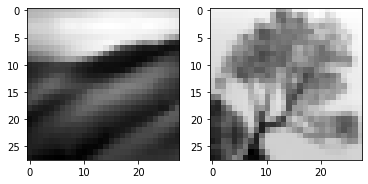

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))
if isinstance(x, list): # if MNIST
    x = x[0]; x_test = x_test[0]
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray', "viridis"][0]);
img1 = x[0][0].numpy()#.transpose((1, 2, 0))
img2 = x_test[0][0].detach().numpy()#.transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder(28*28, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr)
#autoencoder = Autoencoder(224*224, encoding_dim)

Shape : torch.Size([128, 1, 28, 28])


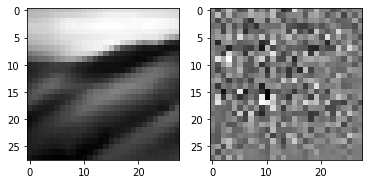

In [6]:
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0]);
axes[0].imshow(x[0][0].numpy()); 
reconstructed = autoencoder(x)
print(f"Shape : {reconstructed.shape}")
axes[1].imshow(reconstructed[0][0].detach().numpy())

In [7]:
%time train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=10)

Epoch 1/10
----------


100%|███████████████████████████████████████████| 27/27 [03:55<00:00,  8.72s/it]


train loss -32.255234


100%|█████████████████████████████████████████████| 7/7 [03:41<00:00, 31.57s/it]


valid loss -44.741454

Epoch 2/10
----------


100%|███████████████████████████████████████████| 27/27 [03:56<00:00,  8.75s/it]


train loss -46.610394


100%|█████████████████████████████████████████████| 7/7 [03:40<00:00, 31.57s/it]


valid loss -48.958619

Epoch 3/10
----------


100%|███████████████████████████████████████████| 27/27 [03:55<00:00,  8.74s/it]


train loss -46.795496


100%|█████████████████████████████████████████████| 7/7 [03:40<00:00, 31.54s/it]


valid loss -48.538732

Epoch 4/10
----------


100%|███████████████████████████████████████████| 27/27 [03:58<00:00,  8.85s/it]


train loss -47.658083


100%|█████████████████████████████████████████████| 7/7 [03:41<00:00, 31.58s/it]


valid loss -49.515931

Epoch 5/10
----------


100%|███████████████████████████████████████████| 27/27 [03:59<00:00,  8.87s/it]


train loss -48.432172


100%|█████████████████████████████████████████████| 7/7 [03:41<00:00, 31.61s/it]


valid loss -50.045697

Epoch 6/10
----------


100%|███████████████████████████████████████████| 27/27 [03:55<00:00,  8.73s/it]


train loss -48.303027


100%|█████████████████████████████████████████████| 7/7 [03:41<00:00, 31.57s/it]


valid loss -50.279656

Epoch 7/10
----------


100%|███████████████████████████████████████████| 27/27 [03:55<00:00,  8.74s/it]


train loss -48.519900


100%|█████████████████████████████████████████████| 7/7 [03:40<00:00, 31.55s/it]


valid loss -50.616076

Epoch 8/10
----------


100%|███████████████████████████████████████████| 27/27 [03:55<00:00,  8.73s/it]


train loss -48.533943


100%|█████████████████████████████████████████████| 7/7 [03:40<00:00, 31.57s/it]


valid loss -50.810412

Epoch 9/10
----------


100%|███████████████████████████████████████████| 27/27 [03:56<00:00,  8.75s/it]


train loss -48.534619


100%|█████████████████████████████████████████████| 7/7 [03:41<00:00, 31.64s/it]


valid loss -49.628496

Epoch 10/10
----------


100%|███████████████████████████████████████████| 27/27 [03:56<00:00,  8.75s/it]


train loss -48.467917


100%|█████████████████████████████████████████████| 7/7 [03:42<00:00, 31.83s/it]

valid loss -50.508800

CPU times: user 36min 54s, sys: 6.96 s, total: 37min 1s
Wall time: 1h 16min 20s


In [11]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]

Image 97


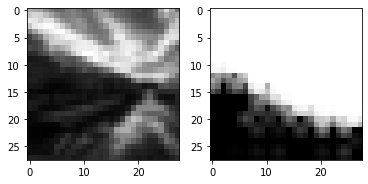

In [29]:
#z = autoencoder(x)
i = np.random.randint(batch_size_test)
print(f"Image {i}")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[i][0].cpu()); axes[1].imshow(autoencoder(x)[i][0].detach().cpu())

In [26]:
ezz

NameError: name 'ezz' is not defined

In [ ]:
model = C_Autoencoder(28*28, encoding_dim).to(device)
model.load_state_dict(torch.load("saved_models/model_c-autoenc28.sav"))

In [ ]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(model(x)[0][0].detach().cpu())